TREINAMENTO DO MODELO DE DETECÇÃO DE LETRAS EM LIBAS

In [15]:
# IMPORT
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [16]:
# Parâmetros
IMAGE_WIDTH, IMAGE_HEIGHT = 32, 32
BATCH_SIZE = 32
EPOCHS = 20
DATASET_DIR = "../dataset"

# Gerador de dados
datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255
)

# Dados de treino
train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training'
)

# Dados de validação
val_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation'
)

# Mapeamento das classes (letras)
class_indices = train_generator.class_indices
print("Mapeamento das classes:", class_indices)

Found 895 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Mapeamento das classes: {'a': 0, 'b': 1, 'c': 2, 'l': 3, 'm': 4, 'n': 5, 'o': 6, 's': 7, 'u': 8, 'v': 9, 'w': 10}


In [17]:
# Salvar mapeamento para uso posterior
import json
with open('../models/class_indices.json', 'w') as f:
    json.dump(class_indices, f)

In [18]:
# Modelo CNN simples
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\edufa\miniconda3\envs\tf310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,851 (1.20 MB)

 Trainable params: 315,851 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


c:\Users\edufa\miniconda3\envs\tf310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3255 - loss: 1.9824 - val_accuracy: 0.8455 - val_loss: 0.4839
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8770 - loss: 0.3894 - val_accuracy: 0.8682 - val_loss: 0.2595
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9339 - loss: 0.1858 - val_accuracy: 0.9545 - val_loss: 0.1752
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9538 - loss: 0.1348 - val_accuracy: 0.9727 - val_loss: 0.1246
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9772 - loss: 0.0692 - val_accuracy: 0.9136 - val_loss: 0.2004
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9872 - loss: 0.0457 - val_accuracy: 0.9455 - val_loss: 0.1473
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9883 - loss: 0.0423 - val_accuracy: 0.9773 - val_loss: 0.1234
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9965 - loss: 0.0221 - val_accuracy: 0.9136 - val_loss: 0.

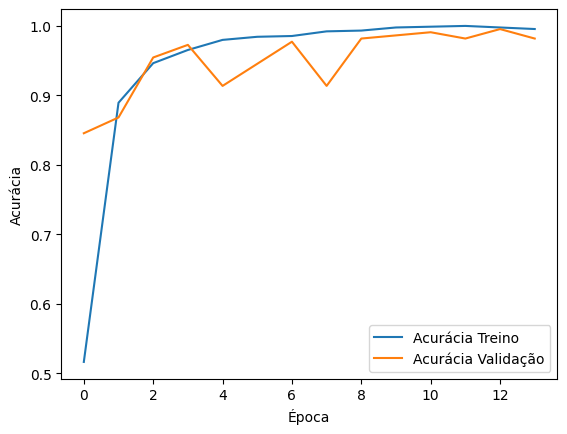

In [19]:
# Treinamento com early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

# Plot dos resultados
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [20]:
# Salva o modelo treinado
model.save('../models/asl_gesture_model2.h5')
print("Modelo salvo como 'asl_gesture_model2.h5'")

Modelo salvo como 'asl_gesture_model2.h5'
